In [80]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from metpy.plots import USCOUNTIES
from datetime import datetime, timedelta
from netCDF4 import num2date
from siphon.catalog import TDSCatalog
import scipy.ndimage as ndimage
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [81]:
def get_gfs_data(url):
    best_gfs = TDSCatalog(url)
    best_ds = best_gfs.datasets[0]
    ncss = best_ds.subset()
    
    query = ncss.query()
    query.lonlat_box(north=55, south=20, east=300, west=220)
    query.accept('netcdf')
    query.variables('Geopotential_height_isobaric')
    query.vertical_level(50000)

    data = ncss.get_data(query)
    
    height_var = data['Geopotential_height_isobaric']
    time_var = data['time']
    lat_var = data['lat']
    lon_var = data['lon']

    height_vals = height_var[:].squeeze()
    lat_vals = lat_var[:].squeeze()
    lon_vals = lon_var[:].squeeze()
    time_vals = num2date(time_var[:].squeeze(), time_var.units)

    lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)
    
    return lon_2d, lat_2d, height_vals, time_vals

def plot_on_map(ax, lon_2d, lat_2d, height_diff, title):
    ax.set_extent([-120, -75, 25, 50], ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=2)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=2)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', linewidth=2)

    contour = ax.contour(lon_2d, lat_2d, height_diff, levels=range(-200, 201, 20), transform=ccrs.PlateCarree(), colors='black', linewidths=0.5, extend='both')
    ax.clabel(contour, fontsize=12, inline=1, inline_spacing=4, fmt='%i')
    contourf = ax.contourf(lon_2d, lat_2d, height_diff, levels=range(-200, 201, 20), transform=ccrs.PlateCarree(), cmap='coolwarm', linewidths=2, extend='both')
    cbar_ax = inset_axes(ax, width="87%", height="3%", loc='lower center', borderpad=0)
    cbar = plt.colorbar(contourf, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Geopotential Height Difference (m)')
    ax.set_title('GFS 500MB: Geopotential Height Tendency', loc='left')
    ax.set_title(f'Valid: {title}', loc='right')
    

In [82]:
urls = [
    'https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201101/20110131/catalog.html?dataset=gfs-g4-anl-files-old/201101/20110131/gfsanl_4_20110131_1200_000.grb2',
    'https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201102/20110201/catalog.html?dataset=gfs-g4-anl-files-old/201102/20110201/gfsanl_4_20110201_0000_000.grb2',
    'https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201102/20110201/catalog.html?dataset=gfs-g4-anl-files-old/201102/20110201/gfsanl_4_20110201_1200_000.grb2',
    'https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201102/20110202/catalog.html?dataset=gfs-g4-anl-files-old/201102/20110202/gfsanl_4_20110202_0000_000.grb2',
    'https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201102/20110202/catalog.html?dataset=gfs-g4-anl-files-old/201102/20110202/gfsanl_4_20110202_1200_000.grb2',
]

In [83]:
lon_2d_list = []
lat_2d_list = []
height_vals_list = []
time_vals_list = []

for url in urls:
    lon_2d, lat_2d, height_vals, time_vals = get_gfs_data(url)
    lon_2d_list.append(lon_2d)
    lat_2d_list.append(lat_2d)
    height_vals_list.append(height_vals)
    time_vals_list.append(time_vals)

differences_list = []

specific_url_names = [
    ("2/1 00z", "1/31 12z"),
    ("2/1 12z", "2/1 00z"),
    ("2/2 00z", "2/1 12z"),
    ("2/2 12z", "2/2 00z"),
]

for i in range(len(urls)-1):
    lon_2d_1, lat_2d_1, height_vals_1, time_vals_1 = lon_2d_list[i], lat_2d_list[i], height_vals_list[i], time_vals_list[i]
    lon_2d_2, lat_2d_2, height_vals_2, time_vals_2 = lon_2d_list[i+1], lat_2d_list[i+1], height_vals_list[i+1], time_vals_list[i+1]
    height_diff = height_vals_2 - height_vals_1
    differences_list.append(height_diff)

C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201101/20110131/catalog.html?dataset=gfs-g4-anl-files-old/201101/20110131/gfsanl_4_20110131_1200_000.grb2 returned HTML. Changing to: https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201101/20110131/catalog.xml?dataset=gfs-g4-anl-files-old/201101/20110131/gfsanl_4_20110131_1200_000.grb2
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,
C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201102/20110201/catalog.html?dataset=gfs-g4-anl-files-old/201102/20110201/gfsanl_4_20110201_0000_000.grb2 returned HTML. Changing to: https://www.ncei.noaa.gov/thredds/catalog/model-gfs-g4-anl-files-old/201102/20110201/catalog.xml?dataset=gfs-g4-anl-files-old/201102/20110201/gfsanl_4_20110201_0000_000.grb2
 

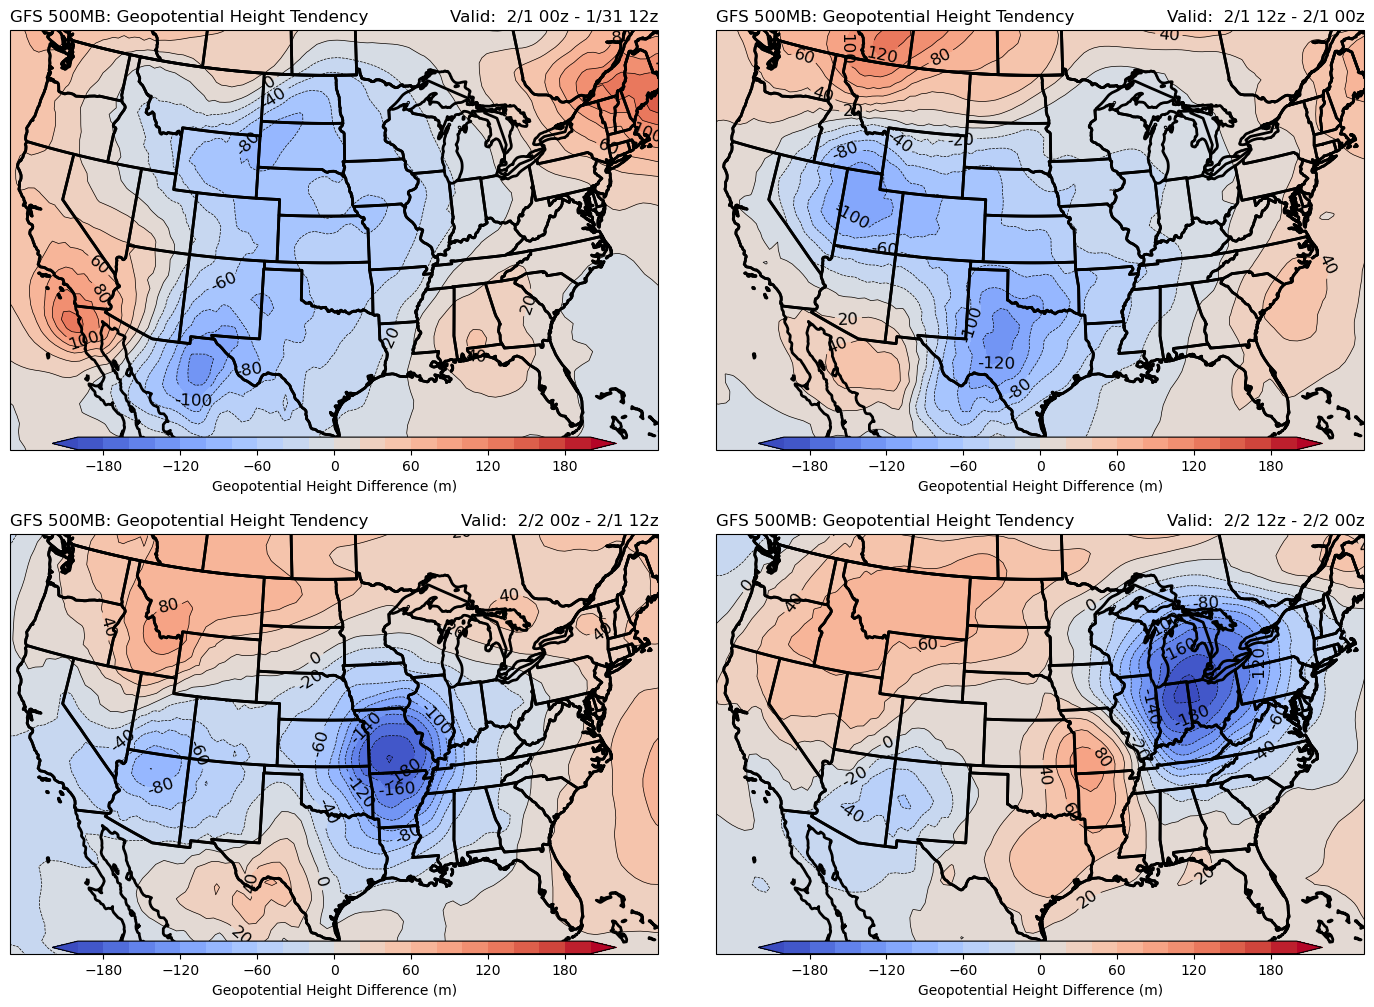

In [87]:
fig = plt.figure(figsize=(18,12))
grid = gridspec.GridSpec(2, 2)
plt.subplots_adjust(wspace=0.025, hspace=0.2)

for i in range(4):
    title = f" {specific_url_names[i][0]} - {specific_url_names[i][1]}"
    ax = fig.add_subplot(grid[i // 2, i % 2], projection=ccrs.LambertConformal(central_longitude=-98, central_latitude=39))
    height_diff = differences_list[i]  # Use the correct height_diff data
    lon_2d = lon_2d_list[i]  # Use the correct lon_2d data
    lat_2d = lat_2d_list[i]  # Use the correct lat_2d data
    plot_on_map(ax, lon_2d, lat_2d, height_diff, title)

plt.show()